PROYECTO FINAL: Estimacion del precio de viviendas en la Ciudad de Mexico

In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('housing_data_CDMX.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18234 entries, 0 to 18233
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               18234 non-null  object 
 1   places                      18234 non-null  object 
 2   lat-lon                     18234 non-null  object 
 3   price                       18234 non-null  float64
 4   currency                    18234 non-null  object 
 5   price_aprox_local_currency  18234 non-null  float64
 6   price_aprox_usd             18234 non-null  float64
 7   surface_total_in_m2         18234 non-null  float64
 8   surface_covered_in_m2       18234 non-null  float64
 9   price_usd_per_m2            18234 non-null  float64
 10  price_per_m2                18234 non-null  float64
dtypes: float64(7), object(4)
memory usage: 1.5+ MB
None


Tenemos un dataframe de 11 columnas y 18,234 registros

DATA PREPROCESSING

Checamos la completitud

In [568]:
completitud = pd.DataFrame(data.isna().sum())
completitud = completitud.rename(columns={0:'nulos_num'})
completitud['completitud'] = (((data.shape[0] - completitud['nulos_num']) / data.shape[0]) * 100).astype('int')
print(completitud)

                            nulos_num  completitud
property_type                       0          100
places                              0          100
lat-lon                             0          100
price                               0          100
currency                            0          100
price_aprox_local_currency          0          100
price_aprox_usd                     0          100
surface_total_in_m2                 0          100
surface_covered_in_m2               0          100
price_usd_per_m2                    0          100
price_per_m2                        0          100


Vemos que no tennemos ningun valor nulo. Completitud del 100

Soltamos los duplicados

In [569]:
#Soltamos duplicados
data = data.drop_duplicates()
print('Despues de soltar los duplicados:', data.shape)

Despues de soltar los duplicados: (15281, 11)


Exploramos cada variable

In [570]:
print(data['property_type'].value_counts(dropna=False).to_string())

property_type
apartment    10572
house         4539
store          156
PH              14


In [571]:
print(data['places'].value_counts(dropna=False).to_string())

places
BenitoJuarez          2979
MiguelHidalgo         1973
AlvaroObregon         1830
Cuauhtemoc            1721
Coyoacan              1142
Tlalpan                903
GustavoAMadero         897
Iztapalapa             882
Cuajimalpa             706
Azcapotzalco           572
VenustianoCarranza     528
Iztacalco              399
MagdalenaContreras     275
Tlahuac                243
Xochimilco             229
MilpaAlta                2


In [572]:
print(data['lat-lon'].value_counts(dropna=False).to_string())

lat-lon
19.407269,-99.190754            358
23.634501,-102.552788           191
19.371992,-99.157853            170
19.390806,-99.195413            162
19.357350,-99.299792            156
19.359004,-99.092622            124
19.401079,-99.24807             113
19.482945:-99.113471            103
19.390415,-99.254997             97
19.350214,-99.162146             90
19.394358,-99.177444             76
19.394073,-99.153915             72
19.420166,-99.220367             71
19.441646,-99.151884             68
19.288275,-99.167125             66
19.381729,-99.164986             65
19.39365,-99.14769               64
19.484102,-99.184360             50
19.395901,-99.097612             41
19.41498,-99.177444              39
19.432657,-99.177444             39
19.2990233,-99.0436467           38
19.417364,-99.159454             37
19.281164,-99.20237              36
19.414261,-99.104118             35
19.364891,-99.148384             34
19.3605334,-99.2267067           33
19.2464696,-99.10134

Tenemos 3 varaibles de precio de propiedad: price, price_aprox_local_currency, price_aprox_usd. La variable price es el valor reportado en los sitios de donde se tomo la info, sin tener en cuenta un tipo de cambio estandarizada y diferentes tazas que afectan al precio real final. La variable price_aprox_local_currency es el valor de la propiedad en la moneda nacional despues de tomar en cuenta todos los factores que afectan al precio final y que permiten comparar los precios incluso de forma internacional. La variable price_aprox_usd es simplemente price_aprox_local_currency convertida a USD, con una taza fija de 18.81 pesos por dolar.

Teniendo en cuenta esto, lo mas prudente es usar la variable price_aprox_local_currency como objetivo y deshacernos de las otras 2 para evitar multicolinealidad.

In [573]:
#Comprobamos price_aprox_usd = 18.81 * price_aprox_local_currency
Prueba = data['price_aprox_local_currency'] / data['price_aprox_usd']
print(Prueba.value_counts().to_string())

18.808500    795
18.808500    115
18.808500    103
18.808500     92
18.808500     87
18.808500     86
18.808500     86
18.808500     78
18.808500     74
18.808500     68
18.808500     58
18.808500     56
18.808500     55
18.808500     55
18.808500     53
18.808500     51
18.808500     49
18.808500     46
18.808500     45
18.808500     44
18.808500     42
18.808500     42
18.808500     41
18.808500     40
18.808500     40
18.808500     40
18.808500     40
18.808500     39
18.808500     39
18.808500     38
18.808500     38
18.808500     35
18.808500     35
18.808500     34
18.808500     32
18.808500     32
18.808500     32
18.808500     31
18.808500     31
18.808500     30
18.808500     30
18.808500     29
18.808500     29
18.808500     28
18.808500     28
18.808500     28
18.808500     28
18.808500     28
18.808500     27
18.808500     27
18.808500     27
18.808500     27
18.808500     26
18.808500     26
18.808500     26
18.808500     26
18.808500     26
18.808500     26
18.808500     

In [574]:
data = data.drop(columns=['price', 'price_aprox_usd'])

In [575]:
print(data['currency'].value_counts(dropna=False).to_string())

currency
MXN    14344
USD      937


Aunque todos los valores monetarios que tomaremos seran en MXN, dejamos la variable currency porque nos informa en que tipo de cambio la propiedad esta siendo anunciada, lo cual nos indica el mercado target del anuncio, cosa que tiene mucho peso en el valor comercial de la propiedad.

In [576]:
print(data['surface_total_in_m2'].value_counts(dropna=False).to_string())

surface_total_in_m2
60.0          793
70.0          749
80.0          607
90.0          513
65.0          488
100.0         381
75.0          368
50.0          341
120.0         258
85.0          246
200.0         215
150.0         200
110.0         165
300.0         163
55.0          162
160.0         153
180.0         146
250.0         143
64.0          139
95.0          132
69.0          119
63.0          108
220.0         108
130.0         103
62.0          100
68.0          100
140.0          92
74.0           92
58.0           90
66.0           89
350.0          87
54.0           82
98.0           82
500.0          81
45.0           81
78.0           78
56.0           76
67.0           76
240.0          72
52.0           69
44.0           66
57.0           65
47.0           64
79.0           62
190.0          62
400.0          61
280.0          61
72.0           59
59.0           59
86.0           59
170.0          59
115.0          59
88.0           58
260.0          58
107.0   

In [577]:
print(data['surface_covered_in_m2'].value_counts(dropna=False).to_string())

surface_covered_in_m2
60.0          792
70.0          740
80.0          606
90.0          501
65.0          487
100.0         377
75.0          368
50.0          339
120.0         245
85.0          244
150.0         199
200.0         192
300.0         166
110.0         161
55.0          160
64.0          143
250.0         142
180.0         138
95.0          131
160.0         130
220.0         120
69.0          119
63.0          112
62.0          105
350.0         103
130.0         101
68.0          101
74.0           94
54.0           92
58.0           91
140.0          88
66.0           87
56.0           85
78.0           82
98.0           81
45.0           80
240.0          80
67.0           75
44.0           73
400.0          73
280.0          73
79.0           69
52.0           69
57.0           68
500.0          68
170.0          67
600.0          66
47.0           65
260.0          64
190.0          63
59.0           63
72.0           62
115.0          61
89.0           58
61.0  

En muchos casos, surfece_total es diferente a surface_covered. Esto es porque la primera es el area total del terreno en el que se encuentra la propiedad y la segunda el area total de la superficie techada. Aunque en la mayoria de los casos surface_total es mayor (propiedades con patios), tambien hay registros en los que surface_covered es mayor debido a que puede haber propiedades con multiples pisos y con patios reducidos.

In [578]:
print(data['price_usd_per_m2'].value_counts(dropna=False).to_string())

price_usd_per_m2
658.581000       21
1317.162000      17
5000.000000      14
1185.727000      11
1097.635000      11
823.226250       11
1580.594500      10
1718.842305      10
1720.359132       9
1016.096429       9
1685.967400       9
987.871500        9
2262.419529       9
1633.280900       8
4000.000000       8
891.617385        8
1729.184431       8
2371.454000       8
752.664000        8
2000.000000       7
790.297250        7
8000.000000       7
1846.488879       7
1053.729667       7
1059.928000       7
1113.942714       7
878.108000        7
632.237800        7
1580.594500       7
692.450914        6
842.983720        6
1299.830987       6
2634.948889       6
774.801176        6
932.145385        6
797.823857        6
1963.768909       6
1215.841846       6
2094.503607       6
4500.000000       6
690.192800        6
537.402000        6
948.581600        6
1227.285059       5
407.344560        5
580.653857        5
1844.026900       5
815.790645        5
2500.000000       5
163

In [579]:
print(data['price_per_m2'].value_counts(dropna=False).to_string())

price_per_m2
2.500000e+04    50
2.000000e+04    47
3.000000e+04    44
1.500000e+04    42
1.000000e+04    38
1.250000e+04    35
3.333333e+04    31
4.000000e+04    30
5.000000e+04    25
1.333333e+04    24
3.500000e+04    24
1.666667e+04    22
1.875000e+04    20
1.300000e+04    20
8.000000e+03    19
5.000000e+03    18
3.200000e+04    18
4.500000e+04    17
2.307692e+04    16
1.310000e+04    16
1.833333e+04    16
1.400000e+04    16
2.083333e+04    16
2.250000e+04    16
3.750000e+04    15
1.800000e+04    15
1.200000e+04    14
3.100000e+04    14
1.600000e+04    14
2.600000e+04    14
1.428571e+04    14
6.666667e+03    14
1.562500e+04    14
2.272727e+04    13
1.900000e+04    13
2.750000e+04    13
7.500000e+03    13
2.625000e+04    13
1.700000e+04    12
1.363636e+04    12
4.294118e+04    12
2.777778e+04    12
1.166667e+04    12
1.928571e+04    11
2.142857e+04    11
1.692308e+04    11
1.222222e+04    11
3.111111e+04    11
1.750000e+04    11
1.100000e+04    11
4.166667e+04    11
2.800000e+04    11

In [580]:
#Comprobamos la conversion del tipo de cambio
data['Prueba'] = data['price_per_m2'] / data['price_usd_per_m2']
print(data['Prueba'].value_counts().to_string())

Prueba
1.000000       313
18.980201       62
18.980200       56
18.980201       46
18.980200       27
18.980201       27
18.980200       26
18.980201       23
18.975700       21
18.980203       18
18.980201       18
18.980202       18
18.975700       17
18.980200       17
18.975701       16
18.980200       15
18.980201       15
18.980200       14
18.980201       14
18.980201       14
18.980201       14
18.980201       13
18.980201       13
18.975700       12
18.980200       12
18.980203       12
18.980201       12
18.980200       11
18.980203       11
18.980202       11
18.980200       11
18.980201       11
18.980202       10
18.980200       10
18.980200       10
18.980200       10
18.975701       10
18.980200       10
18.980201        9
18.980201        9
18.980200        9
18.980202        9
18.980201        9
18.980200        9
18.975700        9
18.980201        9
18.980201        9
18.980200        9
18.980201        8
18.980202        8
1.000000         8
18.980200        8
18.98

Vemos que en general price_usd_per_m2 es conversion de price_per_m2, pero hay unos cuantos registros en donde no es asi y no se corresponde con un tipo de cambio razonable. Como el dataset no especifica a partir de donde se obtiene el precio price_aprox_local_currency, no es posible solo analizarlo como una variable derivada del numero de m2 de las propiedades, por lo cual no podemos obetner ninguna conclusion de ello para las variables price_usd_per_m2 y price_per_m2. Entonces optaremos por deshacernos de los registros en los que data['price_per_m2'] / data['price_usd_per_m2'] sea menor a 17, lo cual no es un tipo de cambio congruente.

De igual forma, nos desharemos de la variable price_usd_per_m2 para evitar multicolinealidad

In [581]:
data = data[data['Prueba'] >= 17]
data = data.drop(columns=['Prueba', 'price_usd_per_m2'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13692 entries, 0 to 18233
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               13692 non-null  object 
 1   places                      13692 non-null  object 
 2   lat-lon                     13692 non-null  object 
 3   currency                    13692 non-null  object 
 4   price_aprox_local_currency  13692 non-null  float64
 5   surface_total_in_m2         13692 non-null  float64
 6   surface_covered_in_m2       13692 non-null  float64
 7   price_per_m2                13692 non-null  float64
dtypes: float64(4), object(4)
memory usage: 962.7+ KB
None


FEATURE ENGINEERING

In [582]:
#Tenemos una variable lat-lon tipo string. Para una mejor manipulacion crearemos dos variables a partir de esta que sean tipo float

data['lat-lon'] = data['lat-lon'].str.replace(':',',') #Algunas registros tinen : en lougar de , para separar la latitu de la longitud
data[['latitud', 'longitud']] = data['lat-lon'].str.split(',', expand=True).astype(float)
data = data.drop(columns='lat-lon') #Nos deshacemos de lat-lon para evitar colinealidad

Al hacer un reporte tipo map en Power BI nos percatamos de que algunos registros no son de la CDMX. Procederemos a borrar dichos registros

In [583]:
#Investigamos los limites de latitud y longitud que corresponden a la cdmx
lat_min, lat_max = 19.0, 19.6
lon_min, lon_max = -99.35, -98.95

#Filtamos los datos
data = data[
    (data['latitud'] >= lat_min) & (data['latitud'] <= lat_max) &
    (data['longitud'] >= lon_min) & (data['longitud'] <= lon_max)]

In [584]:
#Tenemos que la variable currency solo tiene 2 valores MXN y USD, siendo tipo string. Entonces para poder usarla en nuestros modelos la haremos tipo numerica
#con MXN=0 y USD=1. Al solo haber 2 posibles valores no representa un problema para ningun modelo y no hay necesidad del one hot encoding

data['currency'] = data['currency'].map({'MXN':0, 'USD':1})

In [585]:
print(data.shape, 'Terminamos con 13,692 registros y 9 variables\n')
print(data.info())

(13509, 9) Terminamos con 13,692 registros y 9 variables

<class 'pandas.core.frame.DataFrame'>
Index: 13509 entries, 1 to 18233
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               13509 non-null  object 
 1   places                      13509 non-null  object 
 2   currency                    13509 non-null  int64  
 3   price_aprox_local_currency  13509 non-null  float64
 4   surface_total_in_m2         13509 non-null  float64
 5   surface_covered_in_m2       13509 non-null  float64
 6   price_per_m2                13509 non-null  float64
 7   latitud                     13509 non-null  float64
 8   longitud                    13509 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB
None


Por ultimo, eitquetamos las variables

In [586]:
#Reciclando el codigo de la practica 2
d_feats = []
c_feats = []
s_feats = []

#Dividimos nuestras varaibles
for col in data.columns:
    if data[col].dtype == 'float64':
        c_feats.append(col)
    if data[col].dtype == 'object':
        s_feats.append(col)
    if data[col].dtype == 'int64':
        d_feats.append(col)

#Agregamos las etiquetas
d_feats_new = ["d_" + x for x in d_feats]
c_feats_new = ["c_" + x for x in c_feats]
s_feats_new = ["s_" + x for x in s_feats]

#Renombramos en el dataframe
data.rename(columns = dict(zip(c_feats, c_feats_new)), inplace = True)
data.rename(columns = dict(zip(d_feats, d_feats_new)), inplace = True)
data.rename(columns = dict(zip(s_feats, s_feats_new)), inplace = True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13509 entries, 1 to 18233
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   s_property_type               13509 non-null  object 
 1   s_places                      13509 non-null  object 
 2   d_currency                    13509 non-null  int64  
 3   c_price_aprox_local_currency  13509 non-null  float64
 4   c_surface_total_in_m2         13509 non-null  float64
 5   c_surface_covered_in_m2       13509 non-null  float64
 6   c_price_per_m2                13509 non-null  float64
 7   c_latitud                     13509 non-null  float64
 8   c_longitud                    13509 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB
None


OUTLIERS

Procederemos a checar los outliers para la variable objetivo price_aprox_local_currency y las demas variables numericas que estan estrechamente relacionadas con esta primera: surface_total_in_m2, surface_covered_in_m2, price_per_m2. Usaremos el metodo del rango intercuantil.

In [587]:
var_outl_check = ['c_price_aprox_local_currency', 'c_surface_total_in_m2', 'c_surface_covered_in_m2', 'c_price_per_m2']
for i in var_outl_check:
    q1 = data[i].quantile(0.01)
    q3 = data[i].quantile(0.99) #Usamos estos cuantiles porque perfectamente es creible que hayan precios y dimensiones muy grandes en las diferentes propiedades
    iqr = q3 - q1
    lower = 0 #Para deshacernos de algunos cuantos registros obasurdos con valores negativos
    upper = q3 + 1.5 * iqr
    outliers = data[(data[i] < lower) | (data[i] > upper)]
    print(i, "lower:", lower, "upper:", upper)
    print(i,'tiene',outliers.shape[0], 'outliers')
    print('\n')

c_price_aprox_local_currency lower: 0 upper: 73631744.88100001
c_price_aprox_local_currency tiene 10 outliers


c_surface_total_in_m2 lower: 0 upper: 2940.0
c_surface_total_in_m2 tiene 46 outliers


c_surface_covered_in_m2 lower: 0 upper: 2526.2000000000035
c_surface_covered_in_m2 tiene 31 outliers


c_price_per_m2 lower: 0 upper: 234667.30320294
c_price_per_m2 tiene 17 outliers




Vemos que no hay muchos outliers, por lo cual eliminar los registros que los tengan es una buena practica.

In [588]:
for i in var_outl_check:
    q1 = data[i].quantile(0.01)
    q3 = data[i].quantile(0.99) 
    iqr = q3 - q1
    lower = 0
    upper = q3 + 1.5 * iqr
    data = data[(data[i] >= lower) & (data[i] <= upper)]

print('Despues de eliminar los outliers, tenemos un dataset de dimension:', data.shape)
data.to_csv('CleanHousingDataCDMX.csv')

Despues de eliminar los outliers, tenemos un dataset de dimension: (13438, 9)


MODELOS

Primero, debemos ver que hacemos con las dos variables categoricas para poderlas usar en el modelo. Como ambas tienen pocas categorias, haremos One Hot Encoding

In [589]:
#OHE para s_property_type y s_places
cat_cols = [col for col in data.columns if col.startswith('s_')] #Lo hacemos asi para ganar generalidad
print(cat_cols)

#Hacemos el encoding
dummies = pd.get_dummies(data[cat_cols], drop_first=True) #drop_first para evitar multicolinealidad
data = data.drop(columns=cat_cols) #eliminamos las columnas string
data = pd.concat([data, dummies], axis=1) #Agregamos los dummies
print(data.shape)

['s_property_type', 's_places']
(13438, 25)


Vemos como pasamos de 9 a 25 variables, al añadir las dummies. Esto es porque s_property_type tiene 4 categorias y s_places tiene 16, esto se traduce en 20 nuevas variables dummmies. Sumando todo nos daria 29 variables, pero borramos las 2 varaibles categoricas s_property_type y s_places de las que partimos y otras 2 por el drop_first para evitar multicolinealidad, lo que nos da 29 - 4 = 25 variables.

In [590]:
data = data.drop(columns='c_price_per_m2')

Al estar haciendo los primeros dos modelos, nos dimos cuenta como las metricas estaban muy perfectas, lo cual indica data leakage. Despues de un breve analisis pensamos que potencialmente c_price_per_m2 estaba intimamente relacionada con c_price_aprox_local_currency, lo cual estaba haciendo que los modelos aprendieran con la variable objetivo. Al eliminarla, vimos que los metricas presentaron valores congruentes, lo cual confirmo nuestra hipotesis. Aunque no sucede direcatmente que c_price_aprox_local_currency = c_price_per_m2 x c_surface_total_in_m2.


Regrsion Lineal

In [591]:
'''Comencemos con Linear Regression. Nuestra variable objetivo es c_price_aprox_local_currency'''

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [592]:
#Asigno las variables
x = data.drop('c_price_aprox_local_currency', axis=1)
y = data['c_price_aprox_local_currency']

#Divido los datos en train (70%) y test (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [593]:
#Cargo el modelo y meto los datos
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [594]:
#Veamos como predice
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Hacemos las predicciones con los datos test
y_pred = modelo.predict(x_test)
y_pred_train = modelo.predict(x_train)

#Hacemos las metricas
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('La R^2 para los datos de entrenamiento es:', r2_train) #Para comprobar que no haya overfitting
print('La R^2 para los datos de prueba es:', r2_test)
print('La raiz del error cuadratico medio:', rmse)
print('El error absoluto medio:', mae)

La R^2 para los datos de entrenamiento es: 0.4869304515895667
La R^2 para los datos de prueba es: 0.5266586782900492
La raiz del error cuadratico medio: 3631748.950463327
El error absoluto medio: 1977767.9200712934


Vemos como la R2 test es mejor que la R2 train, lo cual es inusual, pero al no haber una gran diferencia no es señal de overfitting o algun error del modelo, tan solo es una casualidad.

Regresion Polinomial

In [595]:
'''Es bastante analogo al anterior, solo que ahora intentamos capturar relaciones no lineales mediante la transforamcion de las variables x a polinomios de grado mayor'''

#Asigno las variables
x = data.drop('c_price_aprox_local_currency', axis=1)
y = data['c_price_aprox_local_currency']

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#Hacmos polinomios de grado 2
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train) #La regresion ya toma en cuenta el bias
x_test_poly = poly.transform(x_test)

In [596]:
#Hacemos la regresion
modelo = LinearRegression()
modelo.fit(x_train_poly, y_train)

LinearRegression()

In [597]:
#Hacemos las predicciones con los datos test
y_pred = modelo.predict(x_test_poly)
y_pred_train = modelo.predict(x_train_poly)

#Hacemos las metricas
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('La R^2 para los datos de entrenamiento es:', r2_train) #Para comprobar que no haya overfitting
print('La R^2 para los datos de prueba es:', r2_test)
print('La raiz del error cuadratico medio:', rmse)
print('El error absoluto medio:', mae)

La R^2 para los datos de entrenamiento es: 0.6524672469293681
La R^2 para los datos de prueba es: 0.624369430302374
La raiz del error cuadratico medio: 3235259.1533126133
El error absoluto medio: 1698200.1493273708


Support Vector Regressor

In [598]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler #Para este modelo necesitamos escalar los datos ya que depende de las distancias a los puntos/registros

#Asigno las variables
x = data.drop('c_price_aprox_local_currency', axis=1)
y = data['c_price_aprox_local_currency']

#Divido los datos en train (70%) y test (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [599]:
#Escalamos las variables
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)

# Definimos el modelo
modelo = SVR(
    kernel='rbf',  #kernel no lineal por defecto
    C=1600.0,        #fuerza de regularización 
    epsilon=1    #ancho del tubo de tolerancia
)

#Etrenamos el modelo con los datos escalados
modelo.fit(x_train_s, y_train)

SVR(C=1600.0, epsilon=1)

In [600]:
#Para hacer las predicciones, tambien tenemos que normalizar los datos test
x_test_s = scaler.transform(x_test)
#Hacemos las predicciones
y_pred = modelo.predict(x_test_s)
y_pred_train = modelo.predict(x_train_s)

In [601]:
#Calculamos las metricas
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('La R^2 para los datos de entrenamiento es:', r2_train) #Para comprobar que no haya overfitting
print('La R^2 para los datos de prueba es:', r2_test)
print('La raiz del error cuadratico medio:', rmse)
print('El error absoluto medio:', mae)

La R^2 para los datos de entrenamiento es: -0.06325014658942174
La R^2 para los datos de prueba es: -0.06302335904717804
La raiz del error cuadratico medio: 5442519.754727909
El error absoluto medio: 2464426.6812200937


Vemos que el modelo funciona muy mal, lo cual es comun para este tipo de algoritmos al usarlos en datasets inmobiliarios con buena cantidad de registros. Los precios de viviendas requieren modelos capaces de manejar: colas largas, discontinuidades y efectos fuertes de ubicación. El kernel RBF aplana todo, por eso el modelo termina prediciendo números cerca del promedio, esto es un MAE enorme.

Decision Tree Regressor

In [602]:
from sklearn.tree import DecisionTreeRegressor

#Asigno las variables
x = data.drop('c_price_aprox_local_currency', axis=1)
y = data['c_price_aprox_local_currency']

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [603]:
#Defino el modelo
modelo_tree = DecisionTreeRegressor(
    max_depth=6,          #asignamos un valor arbitrario para evitar el overfitting
    random_state=0
)

#Entrenamos el modelo
modelo_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [604]:
# Hacemos las predicciones
y_pred = modelo_tree.predict(x_test)
y_pred_train = modelo_tree.predict(x_train)

#Las metricas
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('La R^2 para los datos de entrenamiento es:', r2_train) #Para comprobar que no haya overfitting
print('La R^2 para los datos de prueba es:', r2_test)
print('La raiz del error cuadratico medio:', rmse)
print('El error absoluto medio:', mae)

La R^2 para los datos de entrenamiento es: 0.6883984642858687
La R^2 para los datos de prueba es: 0.6358771341310634
La raiz del error cuadratico medio: 3185316.4632365424
El error absoluto medio: 1572229.0982543316


Hasta ahora, este ha sido el modelo con el mejor rendimiento

Modelos de clasificacion

Primero, veamos la distribucion de los valores de la variable c_price_aprox_local_currency para poder decidir cuantas categorias crear para implemetar los modelos por clasificacion

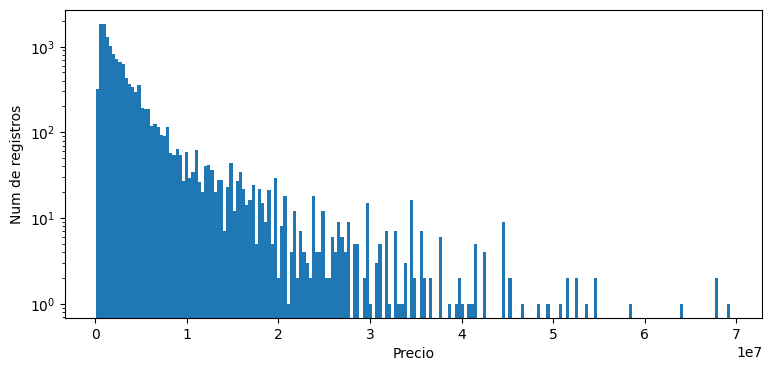

In [605]:
plt.figure(figsize=(9,4))
plt.hist(data['c_price_aprox_local_currency'], bins=200)
plt.yscale('log')
plt.ylabel('Num de registros')
plt.xlabel('Precio')
plt.show()

Vemos como donde mas registros tenemos es en el rango por debajo de los 5 millones de pesos. De los 5 millones a los 30 aun tenemos bastantes registros, pero de ahi en adelante son muy pocas las propiedades que cuentan con un precio mayor. Procederemos a dividir la varaible en 4 cuantiles, tal como lo hicimos en la practica 2.

In [606]:
data['Precio_cat'] = pd.qcut(data['c_price_aprox_local_currency'], q=4, labels=[0, 1, 2, 3])
print(data['Precio_cat'].value_counts(dropna=False))

Precio_cat
0    3361
1    3360
3    3360
2    3357
Name: count, dtype: int64


In [607]:
print(data[data['Precio_cat']=='Bajo']['c_price_aprox_local_currency'].min())
print(data[data['Precio_cat']=='Bajo']['c_price_aprox_local_currency'].max())


nan
nan


Precios max y min de las diferetnes categorias:

3 Alto: 4,062,398.82 - 69,366,761.02

2 Medio-alto: 2,005,005.47 - 4,062,395.81

1 Medio-bajo: 1,012,747.06 - 2,004,639.83

0 Bajo: 109,030.61 - 1,012,506.88

Desicion Tree Clasificator

In [608]:
#Asigno las variables
x = data.drop(['c_price_aprox_local_currency', 'Precio_cat'], axis=1)
y = data['Precio_cat']

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y) #este ultimo parametro ayuda a mantener las proporciones de clases

In [609]:
#Construimos el modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report

modelo_tree = DecisionTreeClassifier(
    criterion='gini',  
    max_depth=10,        #igual que en regresión para controlar complejidad
    random_state=0
)

#Entrenamos el modelo
modelo_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [610]:
#Hacemos las predicciones
y_pred = modelo_tree.predict(x_test)
y_pred_train = modelo_tree.predict(x_train)

#Evaluamos con metricas y diagrama
print("Accuracy para datos de entrenamiento:", accuracy_score(y_train, y_pred_train))
print("Accuracy para datos de prueba:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy para datos de entrenamiento: 0.7240059536466086
Accuracy para datos de prueba: 0.6378968253968254
              precision    recall  f1-score   support

           0       0.68      0.77      0.73      1009
           1       0.53      0.43      0.48      1008
           2       0.57      0.57      0.57      1007
           3       0.74      0.77      0.76      1008

    accuracy                           0.64      4032
   macro avg       0.63      0.64      0.63      4032
weighted avg       0.63      0.64      0.63      4032



Vemos que se logra un buen accuracy para los datos de prueba. Como es de esperarse, las dos categorias Medio-bajo y Medio-alto tienen metricas un poco mas bajas por encontrarse entre 2 categorias

KNN

In [611]:
#Asigno las variables
x = data.drop(['c_price_aprox_local_currency', 'Precio_cat'], axis=1)
y = data['Precio_cat']

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y) #este ultimo parametro ayuda a mantener las proporciones de clases

#En este modelo es muy importante escalar las variables porque  depende de distancias entre puntos
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [612]:
#Creamos el modelo 
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=20)

#Metemos los datos
modelo_knn.fit(x_train_s, y_train)

KNeighborsClassifier(n_neighbors=20)

In [613]:
#Hacemos las predicciones
y_pred = modelo_knn.predict(x_test)
y_pred_train = modelo_knn.predict(x_train)

#Evaluamos con metricas
print("Accuracy para datos de entrenamiento:", accuracy_score(y_train, y_pred_train))
print("Accuracy para datos de prueba:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

C:\Users\Antonio Rojas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Antonio Rojas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy para datos de entrenamiento: 0.25005315755900487
Accuracy para datos de prueba: 0.25
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1009
           1       0.00      0.00      0.00      1008
           2       0.00      0.00      0.00      1007
           3       0.25      1.00      0.40      1008

    accuracy                           0.25      4032
   macro avg       0.06      0.25      0.10      4032
weighted avg       0.06      0.25      0.10      4032



C:\Users\Antonio Rojas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Antonio Rojas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Antonio Rojas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklea

Este modelo no resulta ser bueno, pues por lo visto nuestros datos presentan no solo relaciones lineales.

Red neuronal ANN

In [614]:
#Asigno las variables
x = data.drop(['c_price_aprox_local_currency', 'Precio_cat'], axis=1)
y = data['Precio_cat']
y = data['Precio_cat'].astype('int32') #convertimos a tipo entero en ligar de que sea tipo categorica

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y)

from sklearn.preprocessing import MinMaxScaler #Para escalar los datos

#Escalo los datos
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [615]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


#Construimos la red
n_features = x_train_s.shape[1] #Numero de varables de entrada, neuronas de las primeras capas
n_classes = y.nunique() #clases objetivo, recordemos que son 3: 0=baja, 1=media, 2=alta

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=15, restore_best_weights=True) #Para evitar el overfitting

#Creamos el modelo y sus capas
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_dim=n_features),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0007),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


C:\Users\Antonio Rojas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [616]:
#Entrenamos el modelo
history = model.fit(x_train_s, y_train, batch_size=32, epochs=300, validation_data = (x_test_s, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/300
294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3911 - loss: 1.2781 - val_accuracy: 0.4588 - val_loss: 1.1649
Epoch 2/300
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4657 - loss: 1.1613 - val_accuracy: 0.4812 - val_loss: 1.1182
Epoch 3/300
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4908 - loss: 1.1233 - val_accuracy: 0.5035 - val_loss: 1.0922
Epoch 4/300
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5097 - loss: 1.0952 - val_accuracy: 0.5124 - val_loss: 1.0735
Epoch 5/300
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5161 - loss: 1.0759 - val_accuracy: 0.5253 - val_loss: 1.0554
Epoch 6/300
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5290 - loss: 1.0557 - val_accuracy: 0.5367 - val_loss: 1.0394
Epoch 7/300
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5341 - loss: 1.0433 - val_accuracy: 0.5414 - val_loss: 1.0282
Epoch 8/300
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5375 - loss: 1.0305 - val_accu

En este caso, el accuracy es decente pero no mejor al de los modelos pasados

Random forest calssifier

In [ ]:
#Asigno las variables
x = data.drop(['c_price_aprox_local_currency', 'Precio_cat'], axis=1)
y = data['Precio_cat']
y = data['Precio_cat'].astype('int32') #convertimos a tipo entero en ligar de que sea tipo categorica

#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify=y)

In [618]:
#Definimos el Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)

In [619]:
#Entrenamos
model_rf.fit(x_train, y_train)

#Predecimos
y_pred = model_rf.predict(x_test)
y_pred_train = model_rf.predict(x_train)

#Evaluamos con metricas
print("Accuracy para datos de entrenamiento:", accuracy_score(y_train, y_pred_train))
print("Accuracy para datos de prueba:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy para datos de entrenamiento: 0.7337869445035085
Accuracy para datos de prueba: 0.6520337301587301
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1009
           1       0.56      0.45      0.50      1008
           2       0.58      0.59      0.58      1007
           3       0.76      0.77      0.77      1008

    accuracy                           0.65      4032
   macro avg       0.65      0.65      0.65      4032
weighted avg       0.65      0.65      0.65      4032

